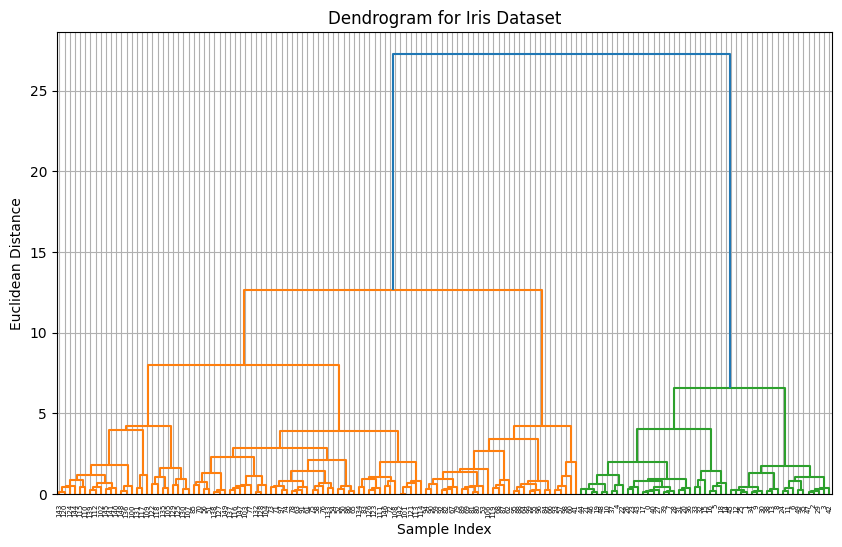

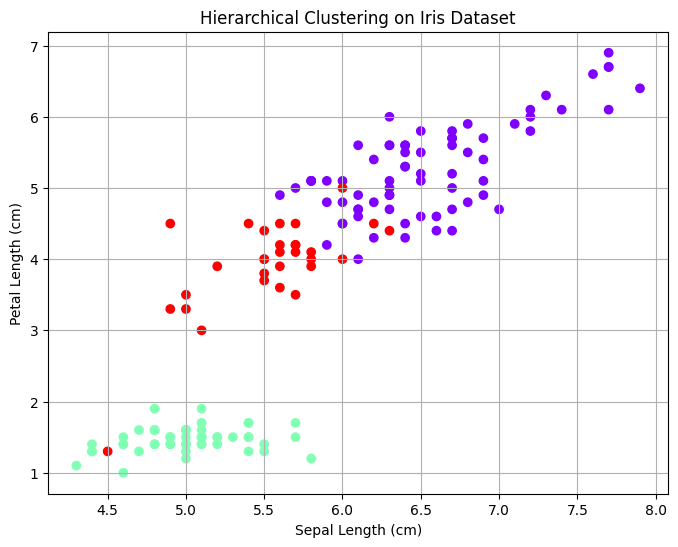

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

# Optional: Standardize the data for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title("Dendrogram for Iris Dataset")
plt.xlabel("Sample Index")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()

# Apply Agglomerative Clustering (Assume 3 clusters for Iris)
model = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
labels = model.fit_predict(X_scaled)

# Add cluster labels to a DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['Cluster'] = labels

# Visualize clusters using two features
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 2], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Hierarchical Clustering on Iris Dataset')
plt.grid(True)
plt.show()

# Print cluster assignments
print(df.head())
